In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

convergence_files = [
    ["multimodal-large-convergence-batched",
    "multimodal-large-convergence-unbatched",],
    ["square-simple-convergence-batched",
    "square-simple-convergence-unbatched",],
    ["steps-small-convergence-batched",
    "steps-small-convergence-unbatched",],
]

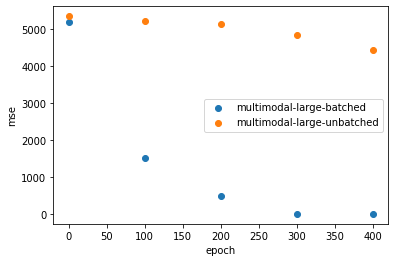

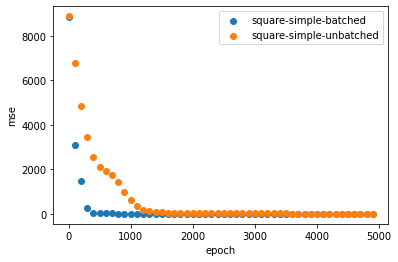

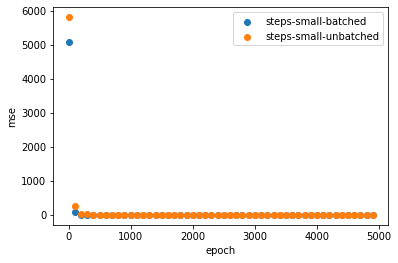

In [2]:
for group in convergence_files:
    for filename in group:
        path = "convdata/" + filename + ".csv"
        data = pd.read_csv(path, names=["epoch", "mse"], header=None)
        prettyname = "-".join(filename.split("-")[0:2] +  filename.split("-")[3:]) 
        plt.scatter(data.epoch, data.mse,label=prettyname)
        plt.legend()
        plt.xlabel("epoch")
        plt.ylabel("mse")
    plt.show()



We can observe a much slower convergence rate for unbatched gradient descent.

In [3]:
weights = []
with open("dumped_weights") as wdump:
    wstrings = [el for el in wdump.read().replace("\n",'').split('"') if len(el) != 0]
    for wstring in wstrings:
        weights.append( eval(f"np.array({wstring})"))

wmax = max(np.max(np.abs(w)) for w in weights )
weights =[ (w/wmax) for w in weights]

In [4]:
import VisualizeNN as VisNN

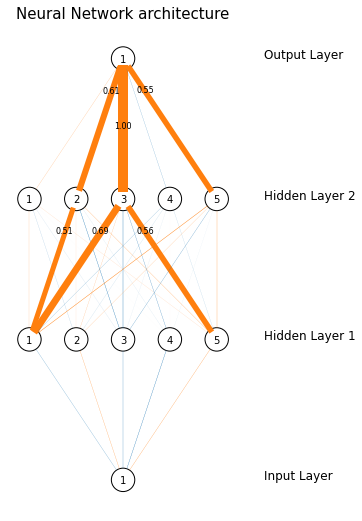

In [5]:
network=VisNN.DrawNN([1,5,5,1],weights)
network.draw()